In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 20})

In [2]:
def plot_results(path, ood=False, k=''):
    df = pd.read_csv(
        path,
        sep='\t')
    
    # filter out num examples to make the plots even
    df = df[df['num_examples'] < 100]
    
    if ood:
        df = df[['ood' in p for p in df['path']]]
        label = f'OOD_k={k}'
    else:
        df = df[['id' in p for p in df['path']]]
        label =f'k={k}'
        
    df['acc'] = 100*df['acc']

    plt.plot(df['num_examples'], df['acc'], label=label, marker='o', markersize=5)
    plt.xlabel("Num examples")
    plt.ylabel("Acc")

    
def plot_results_seeds(path_template, ood=False, k='', custom_label=None):
    all_dfs = []
    SEEDS = [1111, 1112, 1113, 1114, 1115]

    for seed in SEEDS:     
        path = path_template.format(seed=seed, k=k)
        
        try:
            df = pd.read_csv(
            path,
            sep='\t')
            if 'path' not in df.columns:
                print(path)
        except Exception:
            print(f"MISSING: {path}")
            continue
            

        # filter out num examples to make the plots even
        df = df[df['num_examples'] < 100]

        if ood:
            df = df[['ood' in p for p in df['path']]]
            label = f'k={k}'
        else:
            df = df[['id' in p for p in df['path']]]
            label =f'k={k}'
        df['acc'] = 100*df['acc']
        df = df.sort_values('num_examples')
        all_dfs.append(df)

    if custom_label:
        label = custom_label
    all_dfs = pd.concat(all_dfs, ignore_index=True)
    mean = all_dfs.groupby('num_examples').mean()
    std = all_dfs.groupby('num_examples').std()
    print(f"K: {k}")
    print(mean)
    num_trials = len(SEEDS)
    print(1.96 * std / np.sqrt(num_trials))
    plt.plot(mean.index, mean['acc'], label=label, marker='o', markersize=5)
    plt.fill_between(mean.index, mean['acc'] - 1.96 * std['acc'] / np.sqrt(num_trials), mean['acc'] + 1.96 * std['acc'] / np.sqrt(num_trials) , alpha=0.3)
    plt.xlabel("Num examples")
    plt.ylabel("Acc")
    
    
def get_mean_interval(path_template, ood=False, k=''):
    all_dfs = []
    SEEDS = [1111, 1112, 1113, 1114, 1115]

    for seed in SEEDS:     
        path = path_template.format(seed=seed, k=k)
        
        try:
            df = pd.read_csv(
            path,
            sep='\t')
            if 'path' not in df.columns:
                print(path)
        except Exception:
            print(f"MISSING: {path}")
            continue
            

        # filter out num examples to make the plots even
        df = df[df['num_examples'] < 100]

        if ood:
            df = df[['ood' in p for p in df['path']]]
            label = f'OOD_k={k}'
        else:
            df = df[['id' in p for p in df['path']]]
            label =f'k={k}'
        df['acc'] = 100*df['acc']
        df = df.sort_values('num_examples')
        all_dfs.append(df)
    num_trials = len(SEEDS)
    all_dfs = pd.concat(all_dfs, ignore_index=True)
    mean = all_dfs.groupby('num_examples').mean()
    std = all_dfs.groupby('num_examples').std()
    std['acc'] = 1.96 * std['acc'] / np.sqrt(num_trials)
    return mean, std
    

# Transformer GPT-2  16 layer

K: 3
              Unnamed: 0     acc
num_examples                    
0                      0  38.456
1                      1  37.056
2                      2  41.360
4                      3  46.000
8                      4  47.424
16                     5  50.376
32                     6  53.592
64                     7  53.656
              Unnamed: 0       acc
num_examples                      
0                    0.0  2.248946
1                    0.0  1.348981
2                    0.0  2.126216
4                    0.0  1.914791
8                    0.0  2.687485
16                   0.0  2.518898
32                   0.0  4.277897
64                   0.0  3.675413
K: 5
              Unnamed: 0     acc
num_examples                    
0                      0  57.696
1                      1  59.136
2                      2  63.448
4                      3  67.160
8                      4  68.376
16                     5  73.216
32                     6  75.368
64           

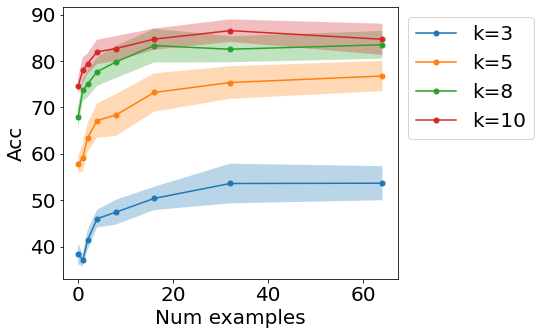

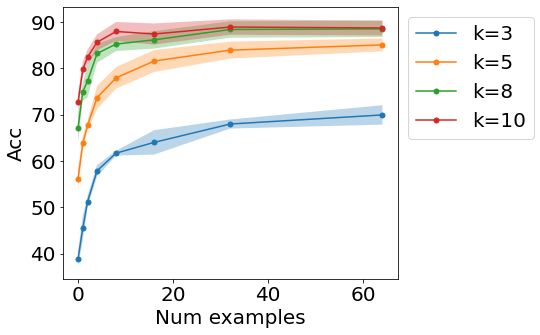

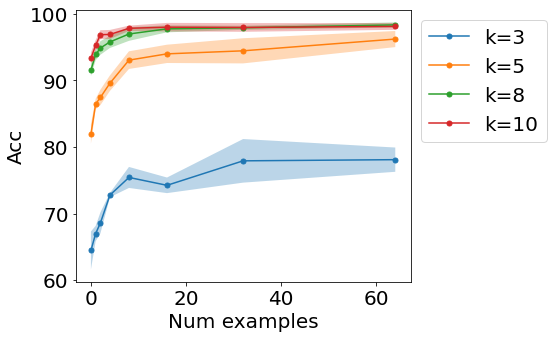

In [66]:
for trans_temp in [0.1]:
    for n_hmms in [10]:
        for n_symbols in [50, 100, 150]:
            plt.figure(figsize=(6,5))
            for k in [3,5,8,10]: 
                plot_results_seeds(f'outputs_large/GINC_trans{trans_temp}_start10.0_nsymbols{n_symbols}_nvalues10_nslots10_vic0.9_nhmms{n_hmms}'+'_SEED{seed}_pretrain/checkpoint-6000/in_context_results_randomsample_{k}.tsv', ood=False,k=k)
            plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

# Transformer GPT-2  (12 layer 12 head)

K: 3
              Unnamed: 0     acc
num_examples                    
0                      0  36.848
1                      1  37.136
2                      2  40.584
4                      3  43.520
8                      4  45.384
16                     5  46.880
32                     6  50.168
64                     7  51.912
              Unnamed: 0       acc
num_examples                      
0                    0.0  4.040180
1                    0.0  2.695934
2                    0.0  3.277701
4                    0.0  2.959535
8                    0.0  3.094229
16                   0.0  4.360830
32                   0.0  5.406156
64                   0.0  5.015235
K: 5
              Unnamed: 0     acc
num_examples                    
0                      0  54.312
1                      1  55.216
2                      2  60.024
4                      3  64.176
8                      4  65.128
16                     5  69.792
32                     6  71.672
64           

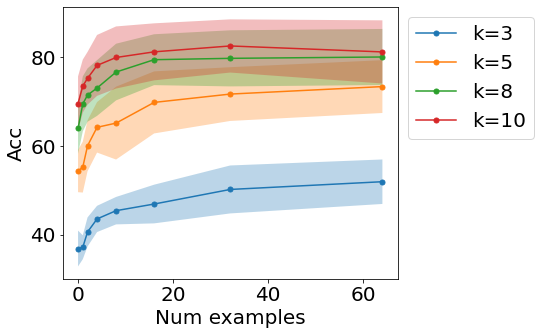

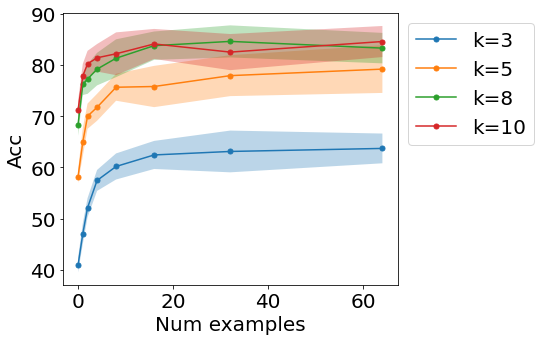

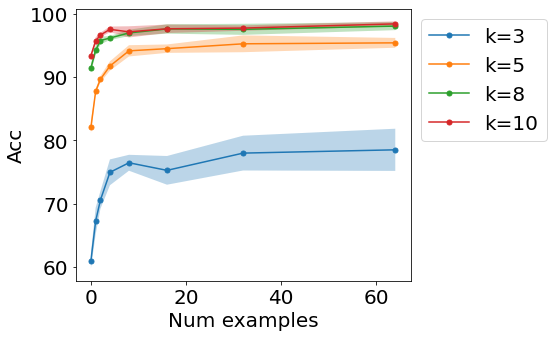

In [68]:
for trans_temp in [0.1]:
    for n_hmms in [10]:
        for n_symbols in [50, 100, 150]:
            plt.figure(figsize=(6,5))
            for k in [3,5,8,10]: 
                plot_results_seeds(f'outputs_medium/GINC_trans{trans_temp}_start10.0_nsymbols{n_symbols}_nvalues10_nslots10_vic0.9_nhmms{n_hmms}'+'_SEED{seed}_pretrain/checkpoint-6000/in_context_results_randomsample_{k}.tsv', ood=False,k=k)
            plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

# Transformer (4 layer 12 head)

K: 3
              Unnamed: 0     acc
num_examples                    
0                      0  32.112
1                      1  32.352
2                      2  35.160
4                      3  36.184
8                      4  38.056
16                     5  38.776
32                     6  39.784
64                     7  41.320
              Unnamed: 0       acc
num_examples                      
0                    0.0  1.128089
1                    0.0  0.864678
2                    0.0  2.792075
4                    0.0  2.958143
8                    0.0  3.838046
16                   0.0  2.909644
32                   0.0  3.712602
64                   0.0  3.288784
K: 5
              Unnamed: 0     acc
num_examples                    
0                      0  45.760
1                      1  47.912
2                      2  49.552
4                      3  50.440
8                      4  49.536
16                     5  52.880
32                     6  53.496
64           

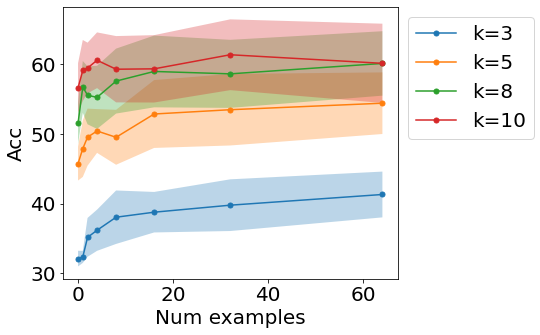

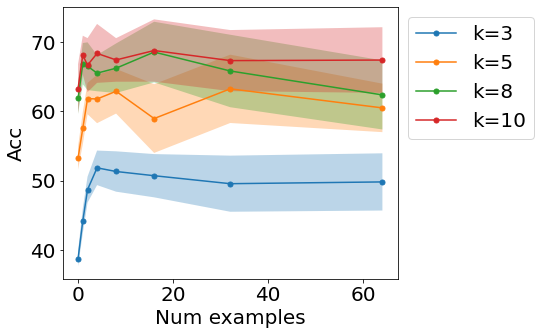

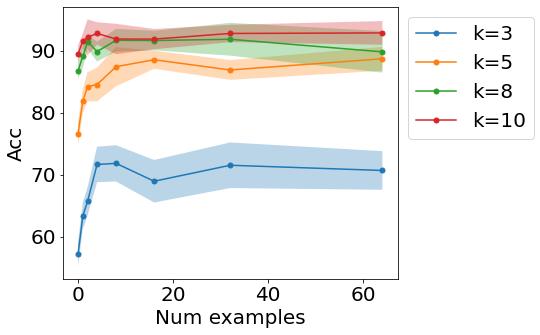

In [69]:
for trans_temp in [0.1]:
    for n_hmms in [10]:
        for n_symbols in [50, 100, 150]:
            plt.figure(figsize=(6,5))
            for k in [3,5,8,10]: 
                plot_results_seeds(f'outputs_small/GINC_trans{trans_temp}_start10.0_nsymbols{n_symbols}_nvalues10_nslots10_vic0.9_nhmms{n_hmms}'+'_SEED{seed}_pretrain/checkpoint-6000/in_context_results_randomsample_{k}.tsv', ood=False,k=k)
            plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

# Transformer varying model sizes

[60.16  81.176 84.688] [5.69234753 7.11834008 3.36210793]
[67.384 84.576 88.72 ] [4.73776072 3.03252984 1.60825136]
[92.84  98.424 98.12 ] [1.90868177 0.39868539 0.51110547]


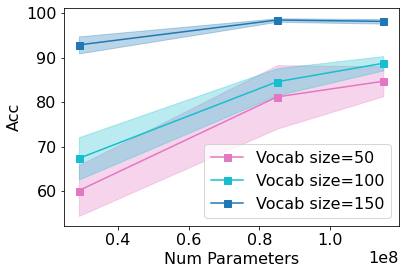

In [112]:
plt.rcParams.update({'font.size': 16})
n_symbols_to_color = {50: 'C6', 100: 'C9', 150: 'C10'}
for trans_temp in [0.1]:
    for n_hmms in [10]:
        for n_symbols in [50, 100, 150]:
            accs = []
            intervals = []
            sizes = [29000000,85000000,115000000]
            k = 10
            
            for directory,label in [('output_small', '4 layer'), ('outputs_medium', '12 layer'), ('outputs_large', '16 layer')]:
                mean, interval = get_mean_interval(f'{directory}/GINC_trans{trans_temp}_start10.0_nsymbols{n_symbols}_nvalues10_nslots10_vic0.9_nhmms{n_hmms}'+'_SEED{seed}_pretrain/checkpoint-6000/in_context_results_randomsample_{k}.tsv',
                                   ood=False,k=k)
                mean = mean[mean.index == 64].iloc[0]
                interval = interval[interval.index == 64].iloc[0]
                accs.append(mean['acc'])
                intervals.append(interval['acc'])
            accs = np.asarray(accs)
            intervals= np.asarray(intervals)
            print(accs, intervals)
            plt.plot(sizes, accs, c=n_symbols_to_color[n_symbols], label=f'Vocab size={n_symbols}', markersize=7, marker='s')
            plt.fill_between(sizes, accs - intervals, accs + intervals , alpha=0.3, color=n_symbols_to_color[n_symbols])
        plt.legend(loc='lower right', ncol=1)
        plt.xlabel('Num Parameters')
        plt.ylabel('Acc')
plt.rcParams.update({'font.size': 20})

# Transformer on OOD thetas

K: 3
              Unnamed: 0     acc
num_examples                    
0                      9  10.336
1                     10   9.376
2                     11   9.608
4                     12  10.088
8                     13   9.200
16                    14   9.216
32                    15   9.504
64                    16   9.008
              Unnamed: 0       acc
num_examples                      
0                    0.0  0.723492
1                    0.0  0.435526
2                    0.0  0.346560
4                    0.0  0.415890
8                    0.0  0.417070
16                   0.0  0.371553
32                   0.0  0.248665
64                   0.0  0.408433
K: 5
              Unnamed: 0     acc
num_examples                    
0                      9  10.792
1                     10   9.624
2                     11  10.696
4                     12  10.368
8                     13   9.864
16                    14  10.384
32                    15  10.232
64           

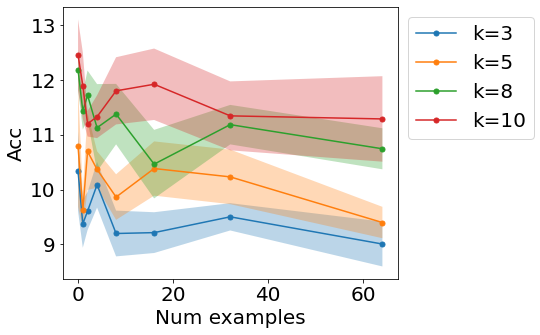

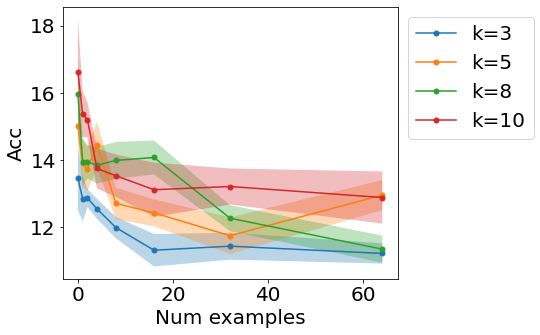

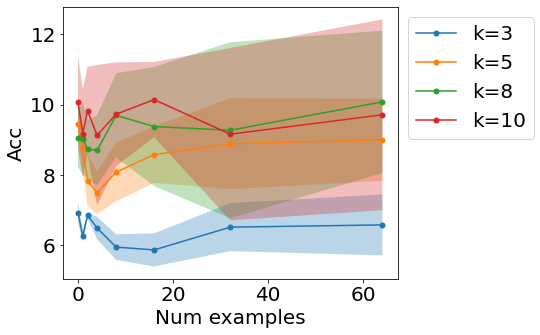

In [114]:
for trans_temp in [0.1]:
    for n_hmms in [10]:
        for n_symbols in [50, 100, 150]:
            plt.figure(figsize=(6,5))
            for k in [3,5,8,10]: 
                plot_results_seeds(f'outputs_small/GINC_trans{trans_temp}_start10.0_nsymbols{n_symbols}_nvalues10_nslots10_vic0.9_nhmms{n_hmms}'+'_SEED{seed}_pretrain/checkpoint-6000/in_context_results_randomsample_{k}.tsv', ood=True,k=k)
            plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)


# Ablations: random data

K: 3
              Unnamed: 0    acc
num_examples                   
0                      0  1.184
1                      1  1.328
2                      2  1.168
4                      3  1.256
8                      4  1.648
16                     5  1.792
32                     6  1.360
64                     7  1.440
              Unnamed: 0       acc
num_examples                      
0                    0.0  0.936741
1                    0.0  1.045810
2                    0.0  0.788456
4                    0.0  0.904357
8                    0.0  0.973361
16                   0.0  1.134879
32                   0.0  0.831188
64                   0.0  0.921992
K: 5
              Unnamed: 0    acc
num_examples                   
0                      0  1.128
1                      1  1.160
2                      2  1.248
4                      3  1.432
8                      4  1.776
16                     5  1.504
32                     6  1.272
64                     7  1.064


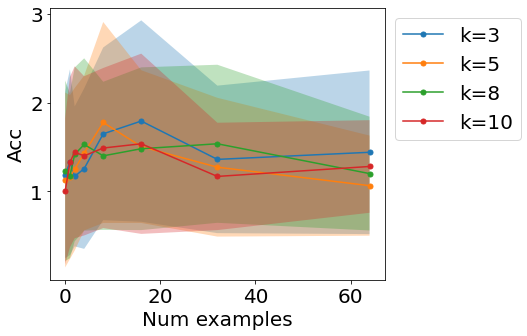

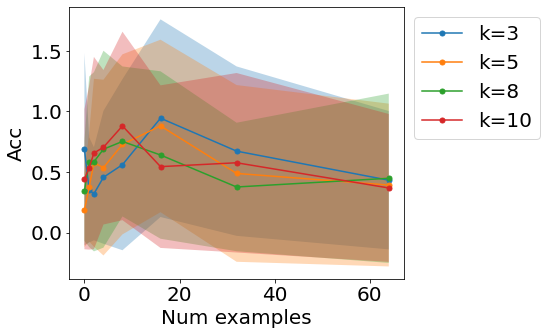

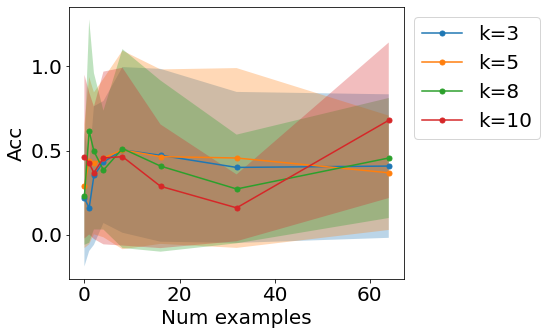

In [108]:
for trans_temp in [0.1]:
    for n_hmms in [10]:
        for n_symbols in [50, 100, 150]:
            plt.figure(figsize=(6,5))
            for k in [3,5,8,10]: 
                plot_results_seeds(f'outputs_small/GINC_trans{trans_temp}_start10.0_nsymbols{n_symbols}_nvalues10_nslots10_vic0.9_randomdata_nhmms{n_hmms}'+'_SEED{seed}_pretrain/checkpoint-6000/in_context_results_randomsample_{k}.tsv', ood=False,k=k)
            plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)


# Ablations: no prior

K: 3
              Unnamed: 0     acc
num_examples                    
0                      0  23.008
1                      1  20.296
2                      2  21.640
4                      3  19.632
8                      4  20.840
16                     5  21.744
32                     6  20.872
64                     7  21.472
              Unnamed: 0       acc
num_examples                      
0                    0.0  0.249652
1                    0.0  0.424809
2                    0.0  0.579842
4                    0.0  0.244678
8                    0.0  0.394345
16                   0.0  0.211244
32                   0.0  0.316914
64                   0.0  0.352713
K: 5
              Unnamed: 0     acc
num_examples                    
0                      0  23.472
1                      1  23.024
2                      2  22.608
4                      3  22.744
8                      4  23.528
16                     5  22.440
32                     6  22.640
64           

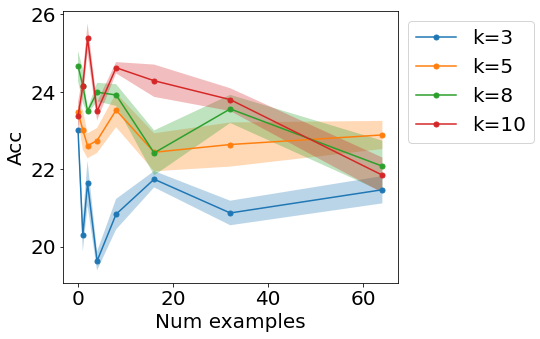

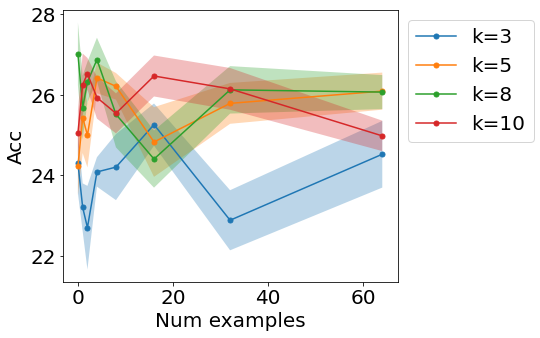

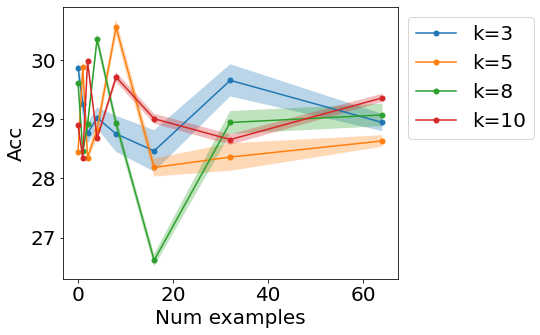

In [109]:
for trans_temp in [0.1]:
    for n_hmms in [10]:
        for n_symbols in [50, 100, 150]:
            plt.figure(figsize=(6,5))
            for k in [3,5,8,10]: 
                plot_results_seeds(f'outputs_small/GINC_trans{trans_temp}_start10.0_nsymbols{n_symbols}_nvalues10_nslots10_vic0.9_noslotprior_nhmms{n_hmms}'+'_SEED{seed}_pretrain/checkpoint-6000/in_context_results_randomsample_{k}.tsv', ood=False,k=k)
            plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)


# Ablations: fast changing properties

K: 3
              Unnamed: 0     acc
num_examples                    
0                      0  19.640
1                      1  20.176
2                      2  20.824
4                      3  21.808
8                      4  21.096
16                     5  22.096
32                     6  22.848
64                     7  20.664
              Unnamed: 0       acc
num_examples                      
0                    0.0  2.071155
1                    0.0  2.059041
2                    0.0  2.087355
4                    0.0  2.241938
8                    0.0  2.038038
16                   0.0  1.749497
32                   0.0  3.633939
64                   0.0  2.648319
K: 5
              Unnamed: 0     acc
num_examples                    
0                      0  23.784
1                      1  27.384
2                      2  27.984
4                      3  29.064
8                      4  27.536
16                     5  25.200
32                     6  22.904
64           

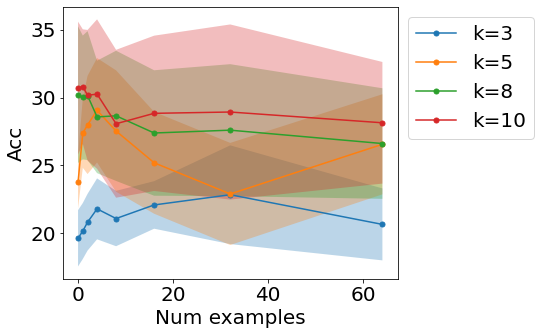

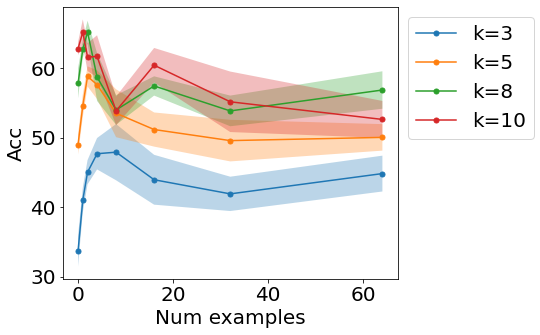

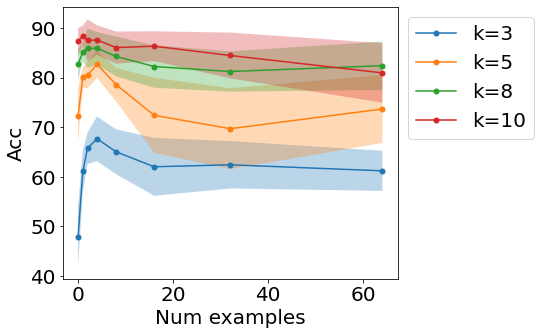

In [110]:
for trans_temp in [0.1]:
    for n_hmms in [10]:
        for n_symbols in [50, 100, 150]:
            plt.figure(figsize=(6,5))
            for k in [3,5,8,10]: 
                plot_results_seeds(f'outputs_small/GINC_trans{trans_temp}_start10.0_nsymbols{n_symbols}_nvalues10_nslots10_vic0.0_nhmms{n_hmms}'+'_SEED{seed}_pretrain/checkpoint-6000/in_context_results_randomsample_{k}.tsv', ood=False,k=k)
            plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

# RNN

K: 3
              Unnamed: 0     acc
num_examples                    
0                      0  34.080
1                      1  37.760
2                      2  42.392
4                      3  44.904
8                      4  44.080
16                     5  45.256
32                     6  45.016
64                     7  45.192
              Unnamed: 0       acc
num_examples                      
0                    0.0  1.587479
1                    0.0  0.788300
2                    0.0  0.868579
4                    0.0  0.479203
8                    0.0  1.289674
16                   0.0  0.785019
32                   0.0  1.181111
64                   0.0  1.186511
K: 5
              Unnamed: 0     acc
num_examples                    
0                      0  66.576
1                      1  77.440
2                      2  80.928
4                      3  84.584
8                      4  84.464
16                     5  84.936
32                     6  84.616
64           

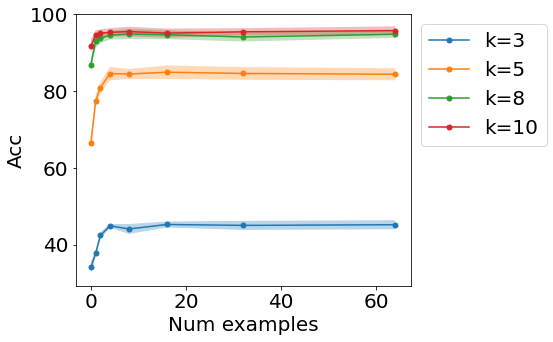

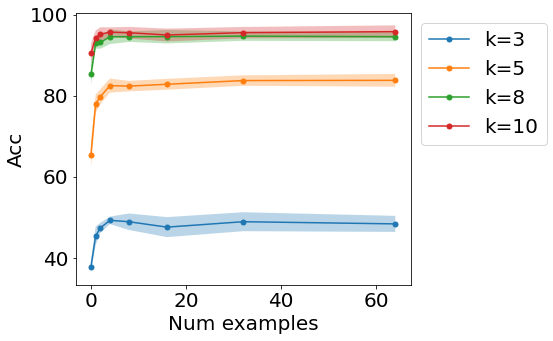

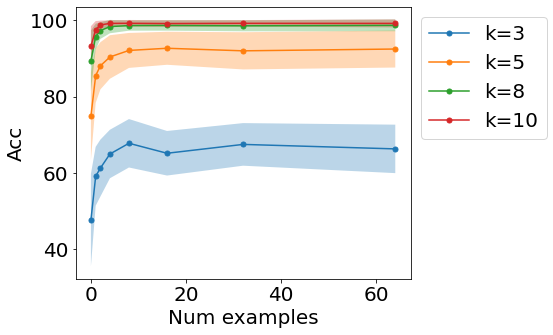

In [111]:
for trans_temp in [0.1]:
    for n_hmms in [10]:
        for n_symbols in [50, 100, 150]:
            plt.figure(figsize=(6,5))
            for k in [3,5,8,10]: 
                plot_results_seeds(f'rnn_output/GINC_trans{trans_temp}_start10.0_nsymbols{n_symbols}_nvalues10_nslots10_vic0.9_nhmms{n_hmms}'+'_SEED{seed}/LSTM_in_context_results_randomsample_{k}.tsv', ood=False,k=k)
            plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)